## Importing libraries

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
%load_ext tensorboard

import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2.17.0


In [72]:
# Set seed
from numpy.random import seed
seed(1)

In [73]:
print("Number of GPUs available: ", len(tf.config.experimental.list_physical_devices("GPU")))

Number of GPUs available:  0


## Loading the FMNIST data

In [74]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [75]:
X_train.shape

(60000, 28, 28)

In [76]:
# Create an array to access the Class name based on label number
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

In [77]:
print(len(X_train), len(X_test))

60000 10000


In [78]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

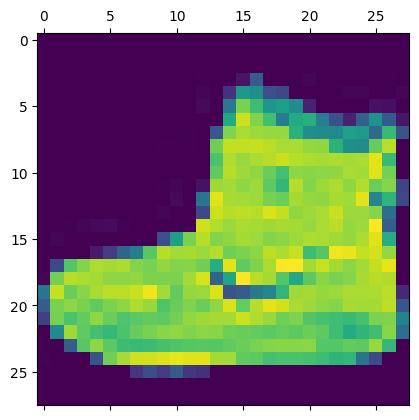

In [79]:
plt.matshow(X_train[0])

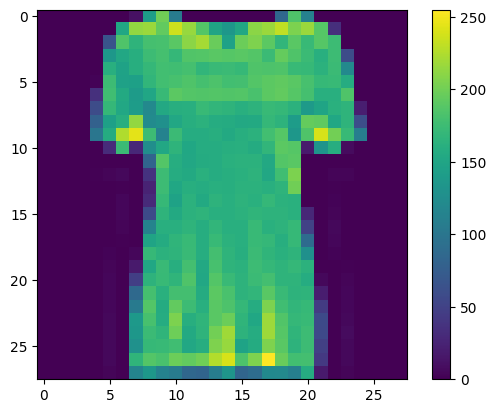

In [80]:
# Check the range of pixel values
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

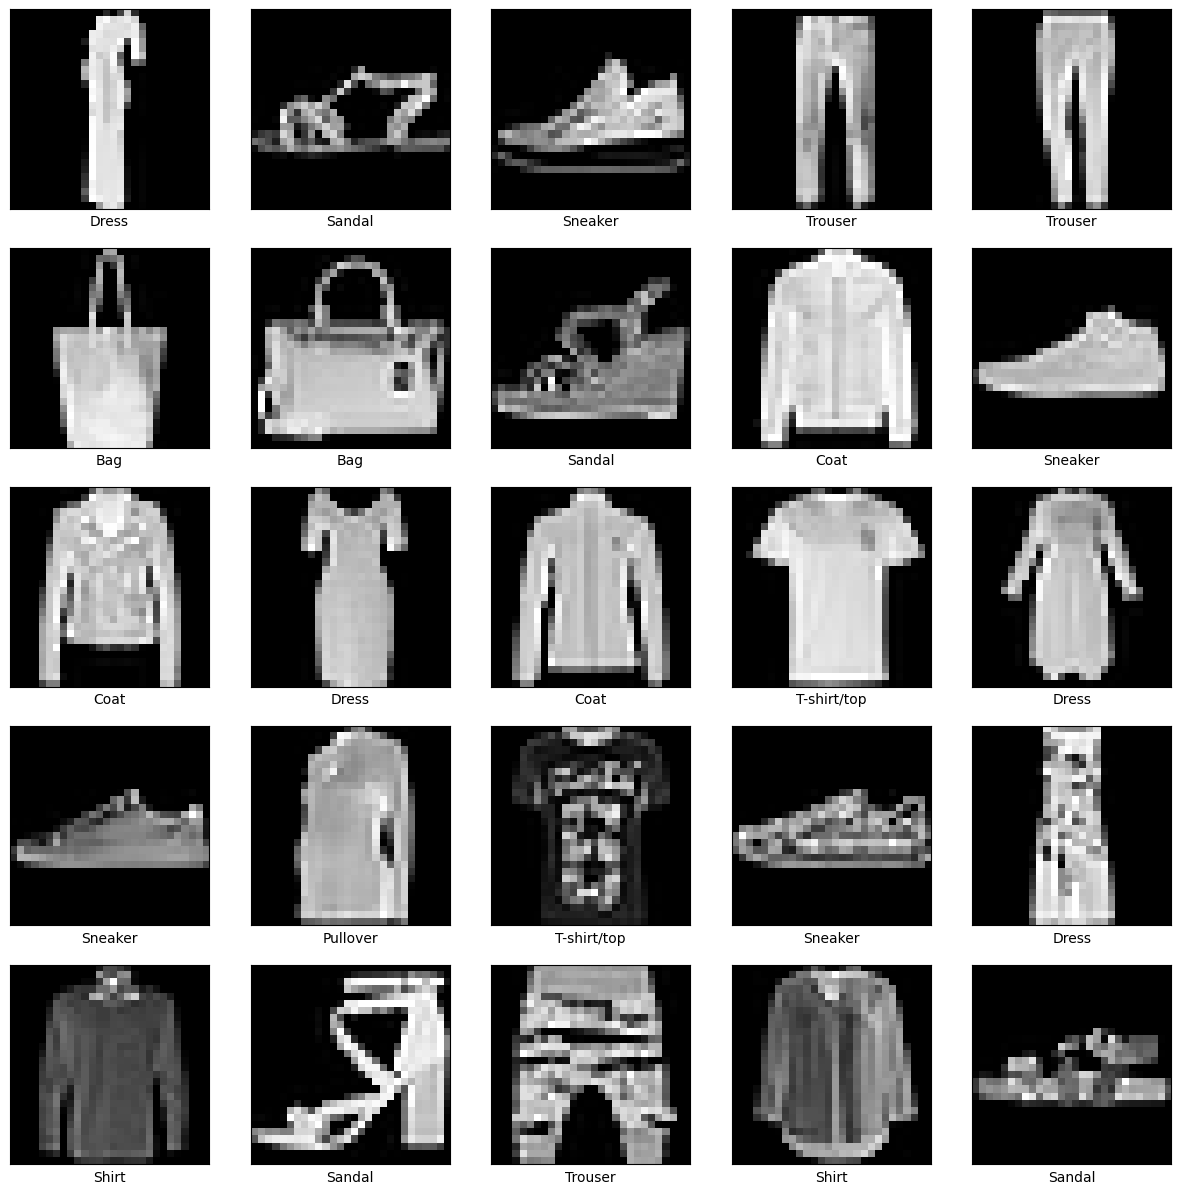

In [81]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    rand_no = random.randint(0, len(X_train))
    plt.imshow(X_train[rand_no], cmap="gray")
    plt.xlabel(class_names[y_train[rand_no]])

## Normalizing the pixel values

In [82]:
X_train = X_train/255.0
y_train = y_train/255.0

## Clear logs from previous runs (tensorboard)

In [83]:
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


## Defining the model

In [84]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    # hidden layer = 512 neurons
    model.add(Dense(512, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    return model

In [85]:
model = create_model()
model.summary()
model.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics= ["accuracy"])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
TensorBoard_callback = TensorBoard(log_dir,histogram_freq=1)
EarlyStopping_callback = EarlyStopping(monitor="val_loss",
                                       min_delta = 0,
                                       patience = 3,
                                       mode = "auto",
                                       baseline = None,
                                       restore_best_weights=True)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.fit(x = X_train,
          y = y_train,
          epochs = 20,
          validation_split = 0.2,
          callbacks = [TensorBoard_callback, EarlyStopping_callback])

Epoch 1/20


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.1007 - loss: 0.0110 - val_accuracy: 0.1030 - val_loss: 3.7894e-07
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0991 - loss: 5.0598e-07 - val_accuracy: 0.1030 - val_loss: 8.7661e-08
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.1002 - loss: 5.5115e-08 - val_accuracy: 0.1030 - val_loss: 2.5470e-08
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.1014 - loss: 1.2221e-08 - val_accuracy: 0.1030 - val_loss: 1.0093e-08
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0993 - loss: 2.3356e-08 - val_accuracy: 0.1030 - val_loss: 5.7220e-09
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0979 - loss: 3.8279e-09 - val_accuracy: 0.1030 - val_loss: 2.9206e-09
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.0987 - loss: 6.2629e-09 - val_accuracy: 0.1030 - val_loss: 1.7881e-09
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━

## Model Evaluation

In [87]:
# %tensorboard --logdir logs/fit

In [88]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1001 - loss: 27048.4492

Test accuracy: 0.10000000149011612


In [89]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [90]:
predictions.shape

(10000, 10)

In [91]:
class_names[np.argmax(predictions[120])]

'T-shirt/top'

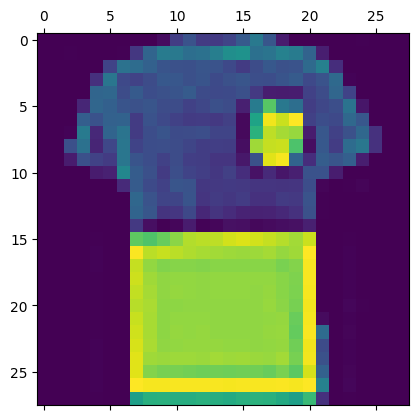

In [92]:
# plt.imshow(X_test[189], cmap="gray")
plt.matshow(X_test[120])